Dataset Link:  https://www.kaggle.com/sankha1998/tmdb-top-10000-popular-movies-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the data

mdata = pd.read_csv("Dataset/TMDb_updated.csv")
mdata.head()

,id,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [4]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   overview           9970 non-null   object 
 3   original_language  10000 non-null  object 
 4   vote_count         10000 non-null  int64  
 5   vote_average       10000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [5]:
# Looking into records containing no overview

mdata[mdata['overview'].isna()]

,id,title,overview,original_language,vote_count,vote_average
98,98,Recep İvedik 6,NaN,tr,21,4.4
394,394,Arjona Circo Soledad en Vivo,NaN,es,0,0.0
644,644,Ustica: The Missing Paper,NaN,it,26,5.6
696,696,Autonomes,NaN,fr,0,0.0
769,769,Tout nous sourit,NaN,fr,0,0.0
998,998,Vivre sans eux,NaN,fr,0,0.0
1438,1438,La noche mágica,NaN,es,0,0.0
1582,1582,The Water Monster,NaN,zh,1,10.0
1631,1631,The Lion,NaN,fr,18,4.6
1650,1650,Mucize 2: Aşk,NaN,tr,1,8.0


In [6]:
# Checking the number of missing data.

mdata['overview'].isna().sum() 

30

In [7]:
# Replacing the null values with blank spaces.

mdata['overview'] = mdata.overview.replace(np.NaN," ")

### Exploratory Data Analysis

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='original_language', ylabel='vote_count'>

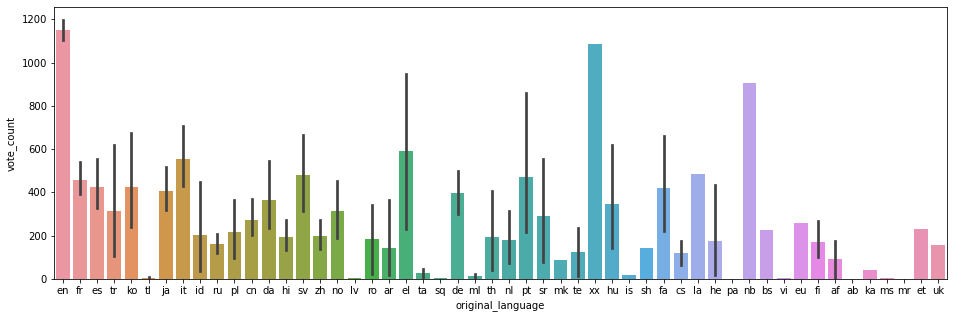

In [8]:
# Plot for Languages and vote count.

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot('original_language','vote_count',data = mdata)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average'>

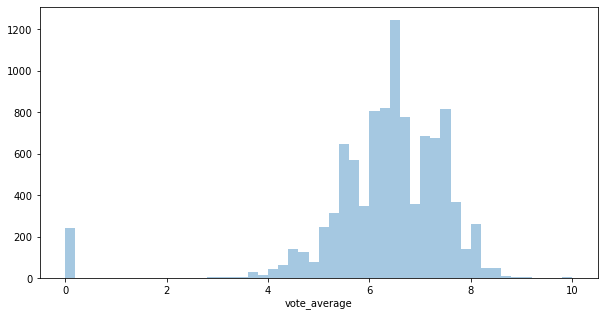

In [9]:
# Ploting voting average of the movies

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(mdata['vote_average'], kde = None)

In [10]:
# Converting the overview data into lowercase

mdata['overview'] = mdata['overview'].apply(lambda x:x.lower()) 

### Text Vectorization
Converting the text into vectors

In [11]:
mdata.head()

,id,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"the near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"after he and his wife are murdered, marine ray...",en,1349,7.2
2,2,Bad Boys for Life,marcus and mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"in their quest to confront the ultimate evil, ...",en,3542,5.9


In [12]:
# Importing the CountVectorizer 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

In [13]:
vectors = cv.fit_transform(mdata['overview']).toarray()

In [14]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
# Converting the vectorized data into a dataframe containing the movie title in y-axis along with the feature names as columns.

vector_matrix = pd.DataFrame(vectors, columns = cv.get_feature_names())
vector_matrix.index = mdata['title']

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
vector_matrix

,000,007,10,100,11,12,12th,13,14,15,...,youths,zach,zealand,zero,zeus,zoe,zombie,zombies,zone,zoo
title,,,,,,,,,,,,,,,,,,,,,
Ad Astra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bloodshot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bad Boys for Life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ant-Man,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percy Jackson: Sea of Monsters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cargo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Good Night,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The World Is Yours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Viewing all the most frequent words
cv.get_feature_names()

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '12th',
 '13',
 '14',
 '15',
 '16',
 '16th',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '1920s',
 '1930s',
 '1940s',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1950s',
 '1960s',
 '1962',
 '1965',
 '1969',
 '1970s',
 '1971',
 '1973',
 '1974',
 '1978',
 '1980',
 '1980s',
 '1984',
 '1990',
 '1990s',
 '1994',
 '1999',
 '19th',
 '20',
 '200',
 '2000',
 '2008',
 '2009',
 '2013',
 '2016',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '30',
 '300',
 '35',
 '3d',
 '40',
 '400',
 '50',
 '500',
 '60',
 '60s',
 '70',
 'aaron',
 'abandoned',
 'abby',
 'abducted',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abroad',
 'absence',
 'abuse',
 'abused',
 'abusive',
 'academic',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'acclaimed',
 'accompanied',
 'accompanies',
 'accomplish',
 'accomplished',
 'account',
 'accountant',
 'accused',
 'ace',
 'achieve',
 'acquaintances',
 'act',
 'acti

### Cosine Similarity
We need to find the cosine similarities between the vectors. Closer the vectors to each other higher is the similarity.


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

# Caclulating the similarity between the vectors
similarity = cosine_similarity(vectors)

In [19]:
# Generating the similarity matrix

similarity_matrix = pd.DataFrame(similarity, index = vector_matrix.index, columns = vector_matrix.index)
similarity_matrix.head()

title,Ad Astra,Bloodshot,Bad Boys for Life,Ant-Man,Percy Jackson: Sea of Monsters,Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn),Live Free or Die Hard,Cold Blood,Underwater,The Platform,...,Attack on Titan,Pokémon: The Rise of Darkrai,Eagle vs Shark,High Flying Bird,Zapped!,Cargo,The Good Night,The World Is Yours,The Grand Seduction,Woochi: The Demon Slayer
title,,,,,,,,,,,,,,,,,,,,,
Ad Astra,1.000000,0.033501,0.000000,0.000000,0.000000,0.000000,0.043033,0.000000,0.099381,0.096225,...,0.029348,0.132020,0.000000,0.000000,0.0,0.043033,0.035136,0.048113,0.029348,0.000000
Bloodshot,0.033501,1.000000,0.035533,0.030303,0.000000,0.000000,0.000000,0.037987,0.000000,0.000000,...,0.000000,0.000000,0.024376,0.110096,0.0,0.000000,0.000000,0.043519,0.000000,0.000000
Bad Boys for Life,0.000000,0.035533,1.000000,0.071067,0.048113,0.051031,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.028583,0.000000,0.0,0.000000,0.000000,0.051031,0.000000,0.000000
Ant-Man,0.000000,0.030303,0.071067,1.000000,0.000000,0.043519,0.000000,0.075974,0.000000,0.000000,...,0.000000,0.029854,0.024376,0.055048,0.0,0.000000,0.000000,0.000000,0.106186,0.055048
Percy Jackson: Sea of Monsters,0.000000,0.000000,0.048113,0.000000,1.000000,0.000000,0.052705,0.000000,0.000000,0.000000,...,0.000000,0.040423,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x:x[1])[1:6]

[(1461, 0.28867513459481287),
 (319, 0.25819888974716115),
 (8266, 0.25819888974716115),
 (628, 0.25717224993681986),
 (2283, 0.2501595914621521)]

In [21]:
# Function for recommending the movie

def recommend(movie):
    movie_index = mdata[mdata['title'] == movie].index[0]
    distance = similarity[movie_index]
    movie_list = sorted(list(enumerate(distance)), reverse = True, key = lambda x:x[1])[0:5]
    
    for i in movie_list:
        print(mdata.iloc[i[0]].title)

In [22]:
recommend('Rocky')

Rocky
Creed
Rocky V
The Fighter
Rocky Balboa
